In [4]:
import os
import sys
from pathlib import Path
import numpy as np
import scipy
import matplotlib.pyplot as plt
from autoeq.frequency_response import FrequencyResponse
from autoeq.peq import LowShelf
ROOT_DIR = Path().absolute().parent

In [24]:
def plot_target(fp, gain, fc=105, q=0.7):
    fr = FrequencyResponse.read_from_csv(fp)
    shelf = LowShelf(fr.frequency, 48e3, fc=fc, q=q, gain=gain)
    fig, ax = fr.plot_graph(show=False, raw_plot_kwargs={'label': fr.name, 'color': 'C0'})
    fig.set_size_inches(6, 4)
    ax.plot(shelf.f, shelf.fr, color='C1', label=f'gain={gain} db, Fc={fc} Hz, Q={q}')
    fr.raw -= shelf.fr
    ax.plot(fr.frequency, fr.raw, color='C2', label=f'{fr.name} without bass boost')
    ax.legend()
    ax.set_ylim([-4, 10])
    return fig, ax, fr

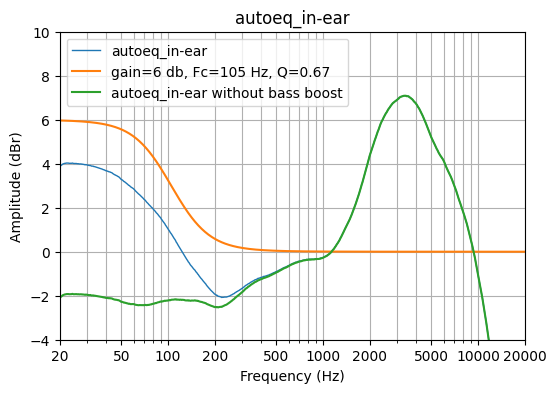

In [45]:
fig, ax, fr = plot_target(ROOT_DIR.joinpath('compensation/autoeq_in-ear.csv'), 6, q=0.67)
fr.write_to_csv(ROOT_DIR.joinpath('compensation/autoeq_in-ear_wo_bass.csv'))
plt.show()

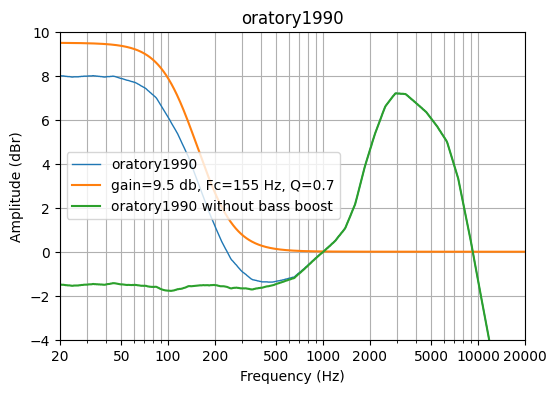

In [40]:
fig, ax, fr = plot_target(ROOT_DIR.joinpath('compensation/oratory1990.csv'), 9.5, fc=155)
fr.write_to_csv(ROOT_DIR.joinpath('compensation/oratory1990_wo_bass.csv'))
plt.show()

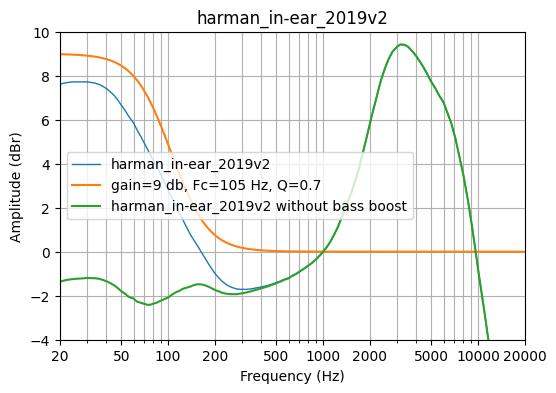

In [28]:
fig, ax, fr = plot_target(ROOT_DIR.joinpath('compensation/harman_in-ear_2019v2.csv'), 9)
plt.show()

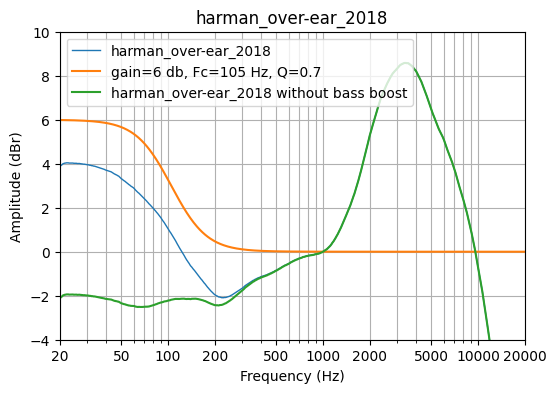

In [27]:
fig, ax, fr = plot_target(ROOT_DIR.joinpath('compensation/harman_over-ear_2018.csv'), 6)
plt.show()

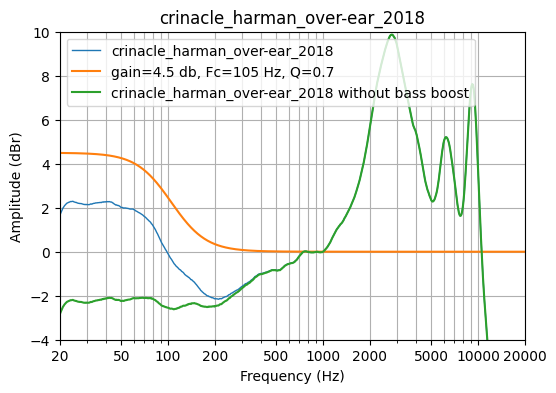

In [26]:
fig, ax, fr = plot_target(ROOT_DIR.joinpath('compensation/crinacle_harman_over-ear_2018.csv'), 4.5)
plt.show()

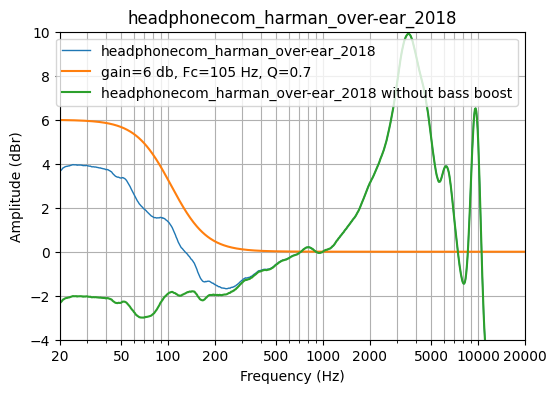

In [47]:
fig, ax, fr = plot_target(ROOT_DIR.joinpath('compensation/headphonecom_harman_over-ear_2018.csv'), 6)
plt.show()

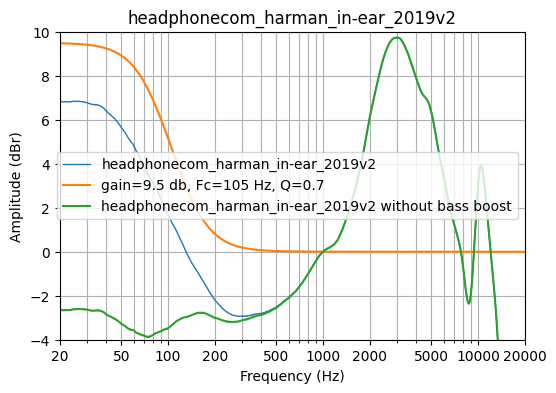

In [48]:
fig, ax, fr = plot_target(ROOT_DIR.joinpath('compensation/headphonecom_harman_in-ear_2019v2.csv'), 9.5)
plt.show()

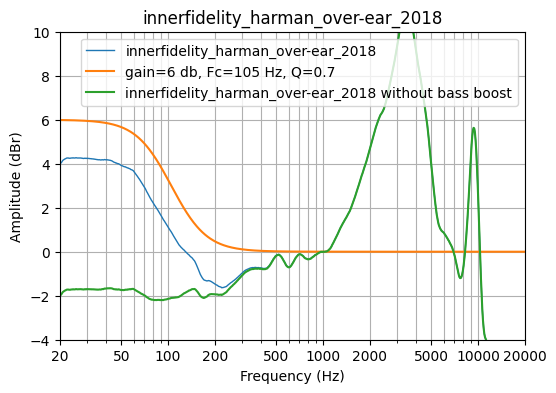

In [49]:
fig, ax, fr = plot_target(ROOT_DIR.joinpath('compensation/innerfidelity_harman_over-ear_2018.csv'), 6)
plt.show()

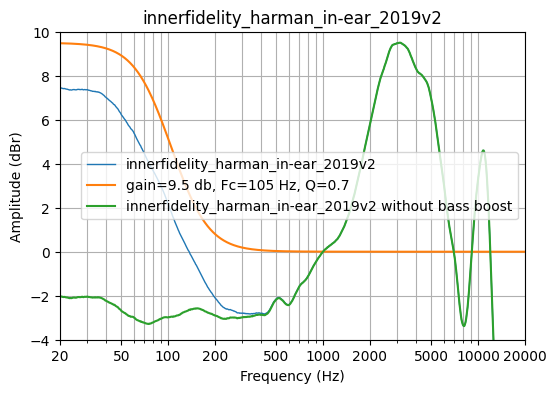

In [50]:
fig, ax, fr = plot_target(ROOT_DIR.joinpath('compensation/innerfidelity_harman_in-ear_2019v2.csv'), 9.5)
plt.show()